# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

import os

# File to Load (Remember to change these)
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")
 

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

### 1. Total Rides for Each City Type

In [4]:
#  1. Get the total rides for each city type
total_ride_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

### 2. Get the Total Drivers for Each City Type

In [5]:
# 2. Get the total drivers for each city type
total_driver_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

### 3. Total Amount of Fares for Each City Type

In [6]:
#  3. Get the total amount of fares for each city type
total_fare_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

### 4. Average Fare per Ride for Each City Type

In [7]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fare_by_city_type / total_ride_by_city_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

### 5. Average Fare per Driver for Each City Type

In [8]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver =  total_fare_by_city_type/ total_driver_by_city_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

### 6. PyBer Summary DataFrame

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
            {"Total Rides": total_ride_by_city_type ,
            "Total Drivers": total_driver_by_city_type,
            "Total fares":  total_fare_by_city_type,
            "Average Fare per Ride": avg_fare_per_ride,
            "Average Fare per Driver":avg_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


### 7. Cleaning up the DataFrame

In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


### 8. Fomatted pyber_summary_df

In [11]:
#  8. Format the columns.

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df


#per_school_summary_df["Total School Budget"] = per_school_summary_df["Total School Budget"].map("${:.2f}".format)


,Total Rides,Total Drivers,Total fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,$34.62,$55.49
Suburban,625,490,19356.33,$30.97,$39.50
Urban,1625,2405,39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

### 1. Read the Merged DataFrame Includes date

In [12]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### 2. Create a DataFreame Showing Sum of the Fares for Each Date and City Type

In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
#pyber_fare_by_type_date = pd.DataFrame(pyber_data_df.groupby(['type', 'date']).sum()["fare"])
pyber_fare_by_type_date = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

pyber_fare_by_type_date

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

### 3.Reset the Index on the DataFrame

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

pyber_fare_by_type_date = pyber_fare_by_type_date.reset_index()
pyber_fare_by_type_date.head(10)


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
5,Rural,2019-01-08 06:19:45,19.39
6,Rural,2019-01-09 15:30:35,31.84
7,Rural,2019-01-11 04:39:27,16.42
8,Rural,2019-01-14 07:09:17,18.05
9,Rural,2019-01-14 15:58:48,54.10


### 4. Create a Pivot Table with Date = Index, Colums = Type, Values = Fare

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 


pyber_fare_by_date_type_pivot  = pyber_fare_by_type_date.pivot(index = "date", columns = "type", values = "fare")
pyber_fare_by_date_type_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


### 5. New DataFrame from the PIVOT Table for 2019-01-01 to 2019-04-29

In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_fare_by_date_range_pivot = pyber_fare_by_date_type_pivot.loc['2019-01-01': '2019-04-29']

#### Get the information about the type of data in the pivot table

In [17]:
pyber_fare_by_date_range_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6+ KB


### 6. Set the "date" Index to datetime Datatype. 

In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

pyber_fare_by_date_range_pivot.index = pd.to_datetime(pyber_fare_by_date_range_pivot.index)

### 7. Check the datatype for the Index using df.info()

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_fare_by_date_range_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


### 8a. Create a New DataFrame using "resample()" Function by week "W" and the Sum of Fare for each week.

In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_fare_by_week = pyber_fare_by_date_range_pivot.resample("W").sum()
pyber_fare_by_week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


### 8b. Create a Graph of Weekly Fare from January - April for the Year 2019

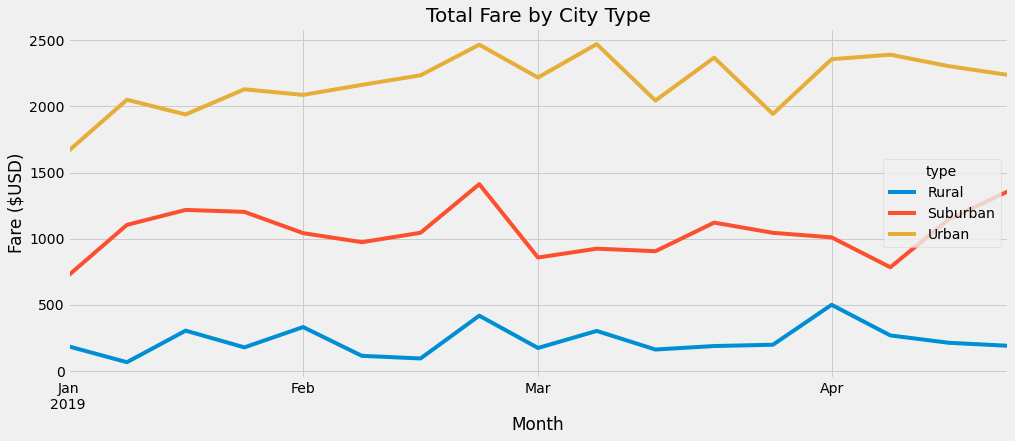

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fare_by_week = pyber_fare_by_week.plot(figsize = (15,6))

fare_by_week.set_xlabel("Month")

fare_by_week.set_ylabel("Fare ($USD)")
fare_by_week.set_title("Total Fare by City Type", fontsize = 20)
fare_by_week.grid(True)

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()
